## What is Multiple Linear Regression?

Multiple Linear Regression is closely related to a simple linear regression model with the difference in the number of independent variables. Whereas the simple linear regression model predicts the value of a dependent variable based on the value of a single independent variable, in Multiple Linear Regression, the value of a dependent variable is predicted based on more than one independent variable.

### The Formula for Multiple Linear Regression

The concept of multiple linear regression can be understood by the following formula-

    y = b0+b1*x1+b2*x2+..........+bn*xn

In the equation, y is the single dependent variable value of which depends on more than one independent variable (i.e. x1,x2,...,xn).

For example, you can predict the performance of students in an exam based on their revision time, class attendance, previous results, test anxiety, and gender. Here the dependent variable(Exam performance) can be calculated by using more than one independent variable. So, this the kind of task where you can use a Multiple Linear Regression model.

Implement Multiple Linear Regression in Python
Now, let's do it together. We have a dataset(Startups.csv) that contains the Profits earned by 50 startups and their several expenditure values. Les have a glimpse of some of the values of that dataset-

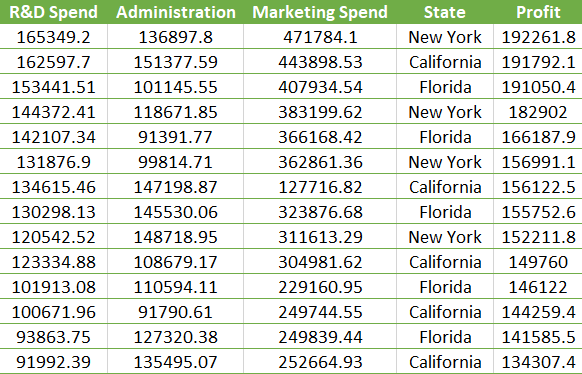

From this dataset, we are required to build a model that would predict the Profits earned by a startup and their various expenditures like R & D Spend, Administration Spend, and Marketing Spend. Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

Let's take Profit as a dependent variable and put it in the equation as y and put other attributes as the independent variables-

Profit = b0 + b1*(R & D Spend) + b2*(Administration) + b3*(Marketing Spend)

From this equation, hope you can understand the regression process a bit clearer.

Now, let's jump to build the model, first the data preprocessing step. Here we will take Profit as in the dependent variable vector y, and other independent variables in feature matrix X.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [2]:
df = pd.read_csv("50_startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,4].values

print(X)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

### The dataset contains one categorical variable. So we need to encode or make dummy variables for that.

In [4]:
# Encoding categorical variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3]) # X["state"]
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [5]:
# Using OneHotEncoder

ohe = OneHotEncoder()

X1 = ohe.fit_transform(X)

## Solving the Dummy Variable Trap

The above code will make two dummy variables(as the categorical variable has two variations). And obviously, our linear equation will use both dummy variables. But this will make a problem. Here both dummy variables are correlated to some extent(that means one's value can be predicted by the other)  which causes multicollinearity, a phenomenon where an independent variable can be predicted from one or more than one independent variable. When multicollinearity exists, the model cannot distinguish the variables properly, therefore predicts improper outcomes. This problem is identified as the Dummy Variable Trap.

To solve this problem, you should always take all dummy variables except one from the dummy variable set.

## Now split the dataset into a training set and test set

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = \
train_test_split(X,y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(35, 4)
(15, 4)


## Its time to fit Multiple Linear Regression to the training set.

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor

LinearRegression()

## Let's evaluate our model how it predicts the outcome according to the test data. 

In [8]:
# Predcitng the test results

y_pred = regressor.predict(X_test)
y_pred[:5]

array([126568.76941326,  86103.32065505,  98856.91970393,  45879.38189926,
       127503.1145004 ])

## Calculating the accuracy score of the model

In [9]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# accuracy = (y_test,y_pred)
# accuracy
mae = mean_absolute_error(y_test,y_pred)
print("The Mean Absolute Error is: ", mae)
mse = mean_squared_error(y_test,y_pred)
print("The Mean Squared Error is: ", mse)

The Mean Absolute Error is:  7371.16153107482
The Mean Squared Error is:  83866027.64389345


In [15]:
y_test, y_pred

(array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
        105733.54, 107404.34,  97427.84, 122776.86, 141585.52, 166187.94,
         89949.14, 152211.77, 182901.99]),
 array([126568.76941326,  86103.32065505,  98856.91970393,  45879.38189926,
        127503.1145004 ,  51963.50258406, 108272.77409836, 100861.53154191,
         98046.22765053, 111719.28851222, 128104.23859919, 173506.28248936,
         94030.7427099 , 148809.64824417, 172762.2638076 ]))

Now, check how our model performed. For this, we will use the Mean Squared Error(MSE) metric from the Sciki-Learn library.

The mean absolute error says our model has performed really bad on the test set. But we can improve the quality of the prediction by building a Multiple Linear Regression model with methods such as Backward Elimination, Forward Selection, etc. which we are going to discuss in the next chapter.

In [18]:
regressor.coef_

array([ 8.02342671e-01, -8.98833727e-02,  2.97842241e-02, -6.16616475e+02])

In [19]:
regressor.intercept_

57412.674523011556